In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Capstone C22-PC414/AllMainData_v2.zip", "r")
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
TRAIN_DIR = "/tmp/AllMainData/TRAIN"
VAL_DIR  = "/tmp/AllMainData/VAL"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, 
                                   height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, 
                                   horizontal_flip = True, fill_mode = "nearest")

# Pass in the appropriate arguments to the flow_from_directory method
train_generator = train_datagen.flow_from_directory(directory=TRAIN_DIR,
                                    batch_size=128, 
                                    class_mode="categorical",
                                    target_size=(224, 224))

# Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
# Remember that validation data should not be augmented
validation_datagen = ImageDataGenerator(rescale = 1./255., validation_split = 0.5)

# Pass in the appropriate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow_from_directory(directory=VAL_DIR,
                                            batch_size=128, 
                                            class_mode="categorical",
                                            target_size=(224, 224),
                                            subset = "training")

test_generator = validation_datagen.flow_from_directory(directory=VAL_DIR,
                                            batch_size=128, 
                                            class_mode="categorical",
                                            target_size=(224, 224),
                                            subset = "validation")

Found 31500 images belonging to 3 classes.
Found 3212 images belonging to 3 classes.
Found 3211 images belonging to 3 classes.


In [ ]:
print(train_generator.class_indices)

{'Non-Recyclable': 0, 'Organic': 1, 'Recyclable': 2}


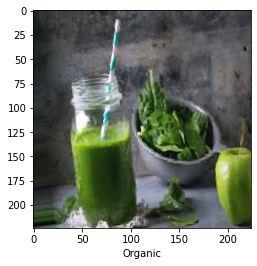

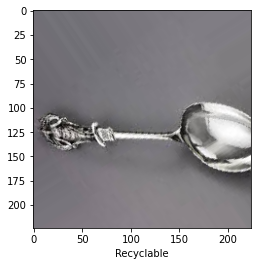

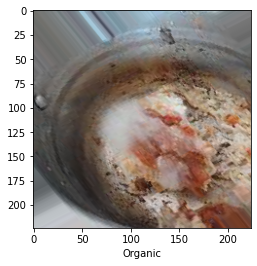

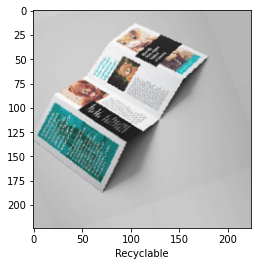

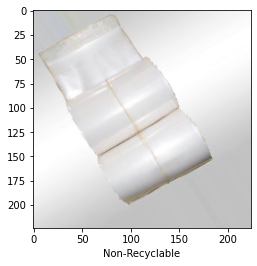

In [ ]:
class_names = ["Non-Recyclable", "Organic", "Recyclable"]
x,y = train_generator.next()

for i in range(5):
    image = x[i]
    label = np.argmax(y[i])
    plt.xlabel(class_names[label])
    plt.imshow(image)
    plt.show()

In [ ]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
])


model.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics=['accuracy']) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
history = model.fit(train_generator,
                    epochs = 10,
                    verbose = 1,
                    validation_data = validation_generator)

Epoch 1/10
247/247 [==============================] - 539s 2s/step - loss: 0.9445 - accuracy: 0.5868 - val_loss: 0.9042 - val_accuracy: 0.5262
Epoch 2/10
247/247 [==============================] - 519s 2s/step - loss: 0.7556 - accuracy: 0.6548 - val_loss: 0.8193 - val_accuracy: 0.6009
Epoch 3/10
247/247 [==============================] - 517s 2s/step - loss: 0.7098 - accuracy: 0.6820 - val_loss: 0.7520 - val_accuracy: 0.6220
Epoch 4/10
247/247 [==============================] - 520s 2s/step - loss: 0.6796 - accuracy: 0.6988 - val_loss: 0.7739 - val_accuracy: 0.6012
Epoch 5/10
247/247 [==============================] - 514s 2s/step - loss: 0.6577 - accuracy: 0.7109 - val_loss: 0.7381 - val_accuracy: 0.6417
Epoch 6/10
247/247 [==============================] - 511s 2s/step - loss: 0.6401 - accuracy: 0.7184 - val_loss: 0.6960 - val_accuracy: 0.6563
Epoch 7/10
247/247 [==============================] - 511s 2s/step - loss: 0.6257 - accuracy: 0.7270 - val_loss: 0.7435 - val_accuracy: 0.6420

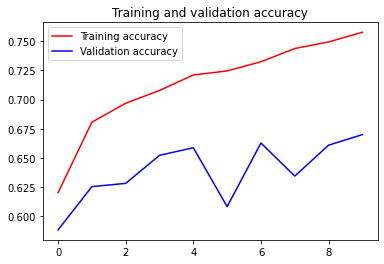

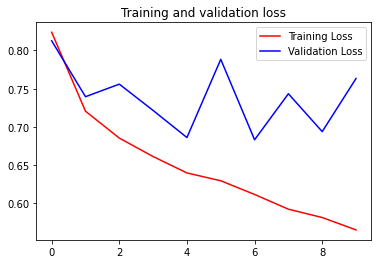

In [ ]:
# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_generator)

26/26 [==============================] - 17s 662ms/step - loss: 0.5951 - accuracy: 0.7253


[0.5950735807418823, 0.7253192067146301]

In [ ]:
#Cara visualize CNN layer nya gimana ya?